In [1]:
import numpy  as np
import pandas as pd
from sklearn.model_selection import train_test_split

import warnings

warnings.filterwarnings("ignore")

dataset_path = "../data/spotify_million_playlist_dataset/playlist_track_mapping.txt"

columns = ['playlistId', 'trackId', 'weight']

In [2]:
df = pd.read_csv(dataset_path, 
                sep=' ',
                names=columns, 
                low_memory=False,  
                encoding="latin-1")
df.head()

,playlistId,trackId,weight
0,202269201444,718638038900,1
1,202269201444,522103160601,1
2,202269201444,808916200056,1
3,202269201444,602509086965,1
4,202269201444,635033516226,1


In [3]:
df = df.iloc[:3500,:]

In [4]:
number_of_playlists = df.playlistId.unique().size
number_of_tracks  = df.trackId.unique().size

In [5]:
print(f"{number_of_playlists} playlists containing {number_of_tracks} songs")

60 playlists containing 3058 songs


In [6]:
df_train, df_test  = train_test_split(df, test_size=0.1, random_state=42)

In [7]:
df_user_item = df_train.pivot(index='playlistId', 
                            columns='trackId', 
                            values='weight').fillna(0)
df_user_item.head()

ui = np.array(df_user_item)

rating_entries = (ui != 0).sum()
total_entries  = (ui >= 0).sum()

print("Sparsity Level:  {:.2f}% ".format(( 1 - ( rating_entries / total_entries )) * 100 ))
    

Sparsity Level:  98.11% 


In [8]:
threshold = 0.5

df_Aui = df_user_item.copy()
df_Aui.head()

df_Aui[(0 < df_user_item) & (df_user_item < threshold)] = -1j
df_Aui[ df_user_item >= threshold ] = 1j

df_Aui.head()

trackId,923225647,1134482295,2290117571,2404190106,2541847843,3266137837,3325228790,3404620669,3936939952,3973005422,...,996455805531,997334056345,997607347642,998069998795,998412507255,998560242049,998999433525,999031286637,999065428356,999990448993
playlistId,,,,,,,,,,,,,,,,,,,,,
17058460329,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,...,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j
27772296918,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,...,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j
35959330360,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,...,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j
37306034563,0.0+0.0j,0.0+1.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,...,0.0+0.0j,0.0+0.0j,0.0+1.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j
44280161757,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,...,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j


In [9]:
print(f"Number of cells with value 1j: {np.count_nonzero(df_Aui == 1j)} out of {df_Aui.size}")

Number of cells with value 1j: 3150 out of 166920


In [10]:
Aui = np.array(df_Aui)
Aiu = (Aui.T) * -1

print("Shape of Aui:", Aui.shape)
print("Shape of Aiu:", Aiu.shape)

num_user = Aui.shape[0] 
num_item = Aui.shape[1]

Auu = np.zeros((num_user, num_user), dtype=complex)
Aii = np.zeros((num_item, num_item), dtype=complex)

print("Shape of Auu:", Auu.shape)
print("Shape of Aii:", Aii.shape)

A = np.vstack([np.hstack([Auu, Aui]), 
               np.hstack([Aiu, Aii])])

print("\t       Shape of A", A.shape)
print("\n\t\t\tA\n" + '-'*55 + "\n" ,A)

Shape of Aui: (60, 2782)
Shape of Aiu: (2782, 60)
Shape of Auu: (60, 60)
Shape of Aii: (2782, 2782)
	       Shape of A (2842, 2842)

			A
-------------------------------------------------------
 [[ 0.+0.j  0.+0.j  0.+0.j ...  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j ...  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j ...  0.+0.j  0.+0.j  0.+0.j]
 ...
 [-0.+0.j -0.+0.j -0.+0.j ...  0.+0.j  0.+0.j  0.+0.j]
 [-0.+0.j -0.+0.j -0.+0.j ...  0.+0.j  0.+0.j  0.+0.j]
 [-0.+0.j -0.+0.j -0.+0.j ...  0.+0.j  0.+0.j  0.+0.j]]


In [11]:
from corlp import calculate_matrix_power_of

powers_of_A = calculate_matrix_power_of(A)

unrated_track_indexes = np.where(df_user_item==0)
arr = np.array(unrated_track_indexes)
arr.shape


	       Shape of A^9 (2842, 2842)

			A^9
		--------------------
[[0.+0.000000e+00j 0.+0.000000e+00j 0.+0.000000e+00j ... 0.+3.294560e+05j
  0.+5.100840e+05j 0.+3.385701e+06j]
 [0.+0.000000e+00j 0.+0.000000e+00j 0.+0.000000e+00j ... 0.+1.743000e+03j
  0.+7.916900e+04j 0.+1.522503e+06j]
 [0.+0.000000e+00j 0.+0.000000e+00j 0.+0.000000e+00j ... 0.+2.450000e+03j
  0.+1.111900e+04j 0.+4.374350e+05j]
 ...
 [0.-3.294560e+05j 0.-1.743000e+03j 0.-2.450000e+03j ... 0.+0.000000e+00j
  0.+0.000000e+00j 0.+0.000000e+00j]
 [0.-5.100840e+05j 0.-7.916900e+04j 0.-1.111900e+04j ... 0.+0.000000e+00j
  0.+0.000000e+00j 0.+0.000000e+00j]
 [0.-3.385701e+06j 0.-1.522503e+06j 0.-4.374350e+05j ... 0.+0.000000e+00j
  0.+0.000000e+00j 0.+0.000000e+00j]]


(2, 163770)

In [16]:
def test_recommender_system(A, N):
  trained_Aui = A[0: number_of_playlists,
                 number_of_playlists:A.shape[1]]
  
  indexes = (-trained_Aui).argsort(axis=1)
  
  
  rec = {}
  for u in range(0, number_of_playlists):
    mask   = np.isin(indexes[u],unrated_track_indexes[u])
    rec[u] = indexes[u][mask]
   
  
  recommended_item_indexes = np.zeros((number_of_playlists, N), dtype=int)
  for u in range(0, number_of_playlists):
    row = rec[u][:N]
    recommended_item_indexes[u] = row

  recommended_track_id = df_user_item.columns[recommended_item_indexes.ravel()]
  
  hit = 0
  for user_id, track_ids in enumerate(recommended_track_id):
    
    mask_user  = df_test['playlistId'].isin([(user_id+1)])
    mask_track = df_test['trackId'].isin([track_ids])
    hit += df_test[mask_user & mask_track]['trackId'].count()
 

  hit_rate = hit / len(df_test.index)
  coverage = len(np.unique(recommended_track_id)) / number_of_tracks
  
  return (hit_rate, coverage)

In [17]:
unrated_track_indexes = {}
for A, B in zip(arr[0], arr[1]):
  if A in unrated_track_indexes:
    unrated_track_indexes[A].append(B)
  else:
    unrated_track_indexes[A] = [B]

from tqdm import tqdm

test_results = {}

number_of_recommended_item = np.arange(10, 110, 10) 

power = 3
for A in tqdm(powers_of_A):
  for N in tqdm(number_of_recommended_item):
    
    result = test_recommender_system(A, N)
    
    if power in test_results:
      test_results[power].append(result)
    else:
      test_results[power] = [result]
      
  power += 2

100%|██████████| 4/4 [00:14<00:00,  3.61s/it]


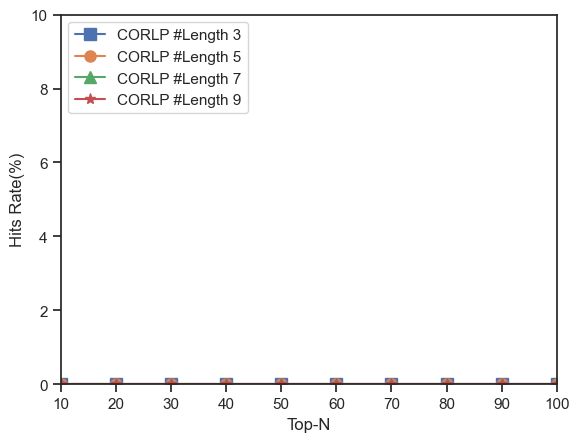

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks")

x = np.arange(10, 110, 10)
y = []
for key, value in test_results.items():
    [y.append(hit_rate[0]*100) for hit_rate in value]

fig, ax = plt.subplots()
ax.plot(x, 
        y[:10],
        marker='s', 
        markersize=8,
        label='CORLP #Length 3')

ax.plot(x, 
        y[10:20],
        marker='o', 
        markersize=8,
        label='CORLP #Length 5')

ax.plot(x, 
        y[20:30],
        marker='^', 
        markersize=8,
        label='CORLP #Length 7')

ax.plot(x,
        y[30:],
        marker='*', 
        markersize=8,
        label='CORLP #Length 9')

plt.xlabel("Top-N")
plt.ylabel("Hits Rate(%)")
ax.set_xlim(x.min(), x.max())
ax.set_ylim(min(y), max(y)+10)

leg = ax.legend(loc='upper left')

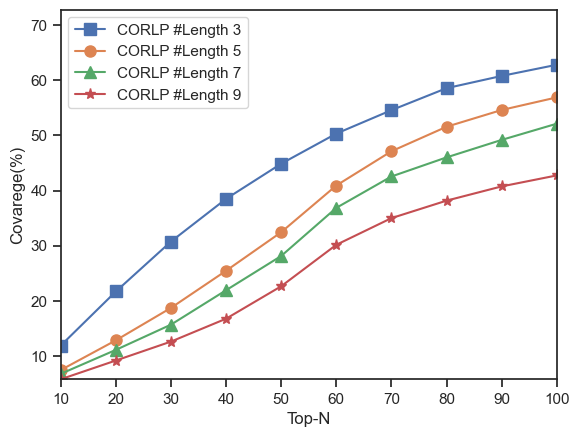

In [21]:
import seaborn as sns
sns.set(style="ticks")

x = np.arange(10, 110, 10) 
y = []
for key, value in test_results.items():
    [y.append(coverage[1]*100) for coverage in value]

fig, ax = plt.subplots()
ax.plot(x, 
        y[:10],
        marker='s', 
        markersize=8,
        label='CORLP #Length 3')

ax.plot(x, 
        y[10:20],
        marker='o', 
        markersize=8,
        label='CORLP #Length 5')

ax.plot(x, 
        y[20:30],
        marker='^', 
        markersize=8,
        label='CORLP #Length 7')

ax.plot(x,
        y[30:],
        marker='*', 
        markersize=8,
        label='CORLP #Length 9')

plt.xlabel("Top-N")
plt.ylabel("Covarege(%)")
ax.set_xlim(x.min(), x.max())
ax.set_ylim(min(y), max(y)+10)

leg = ax.legend(loc='upper left')